In [2]:
import sys
sys.path.insert(0,'C:\\code\\python_for_the_financial_economist\\')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

# animations, etc. requires below magic command
# %matplotlib notebook


"""
Load relevant packages
"""

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# matrix square root
from scipy.linalg import sqrtm
from scipy import stats

# packages for convex programming
import cvxopt
import cvxpy as cp

# Optimization

## Introduction to optimization

In [66]:
# define cubic function
def f(x):
    return 2*x**3 + 3*x**2 - 5*x + 1

def f_prime(x):
    return 6*x**2 + 6*x - 5

def f_double_prime(x):
    return 12*x + 6

# define domain
domain = np.linspace(-3, 1.5, 1000)

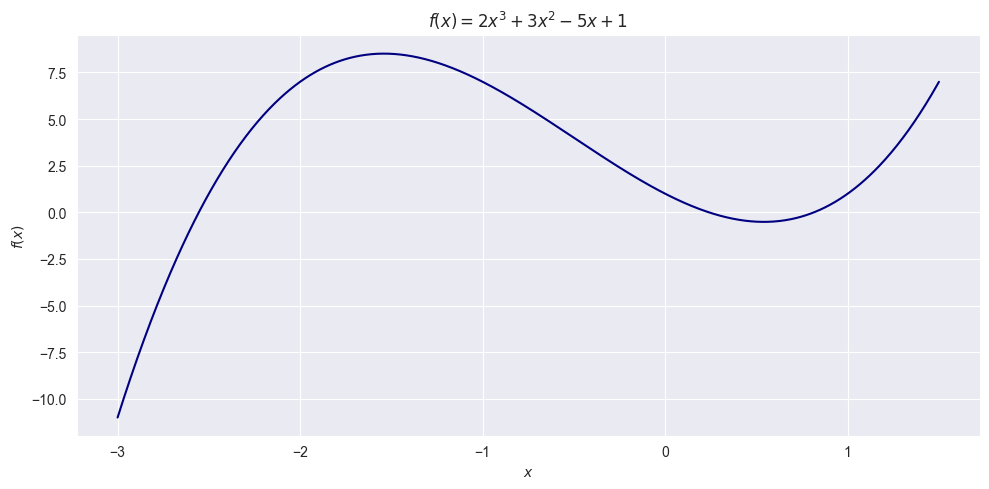

In [37]:
"""
Plot functions
"""

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(domain, f(domain), label='$f(x)$', color='navy')

ax.set_title(r'$f(x) = 2x^3 + 3x^2 - 5x + 1$')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

plt.tight_layout()

plt.savefig('example1_function.png', dpi=300)

In [48]:
"""
Find critical points
"""
critical_points = np.roots([6, 6, -5])
print("Critical points (roots of f'(x)):", critical_points)

Critical points (roots of f'(x)): [-1.540833  0.540833]


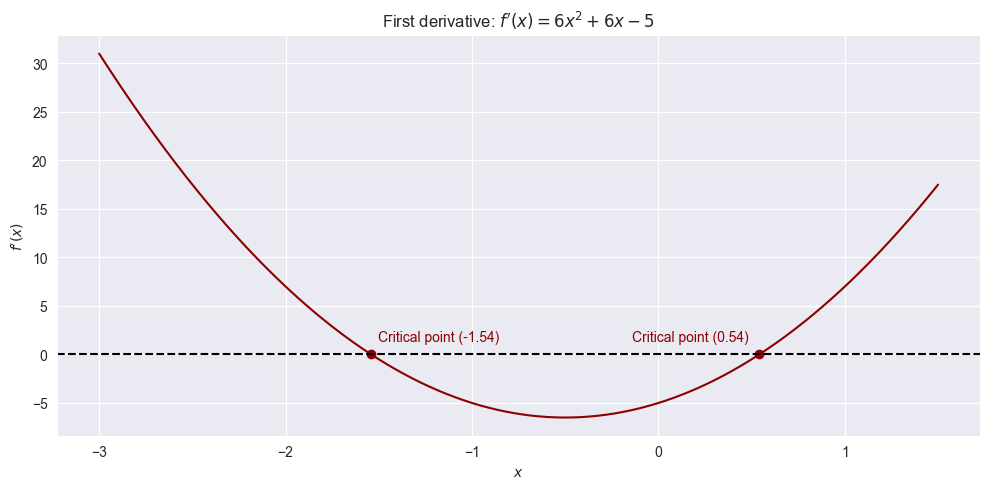

In [70]:
"""
Plot derivative
"""

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(domain, f_prime(domain), label=r'First derivative: $f^\prime(x)$', color='darkred')
ax.scatter(critical_points, np.zeros_like(critical_points), color="darkred")

for i, cp in enumerate(critical_points):
    if i == 0:
        offset = 50
    elif i == 1:
        offset = -50

    ax.annotate(f'Critical point ({cp:.2f})', xy=(cp, 0), xytext=(cp + offset, 10),
                textcoords='offset points', ha='center', color='darkred')

ax.axhline(0, color='black', ls="--")

ax.set_title(r'First derivative: $f^\prime (x) = 6x^2 + 6x - 5$')
ax.set_xlabel('$x$')
ax.set_ylabel(r'$f^\prime (x)$')

plt.tight_layout()

plt.savefig('example1_function_prime.png', dpi=300)

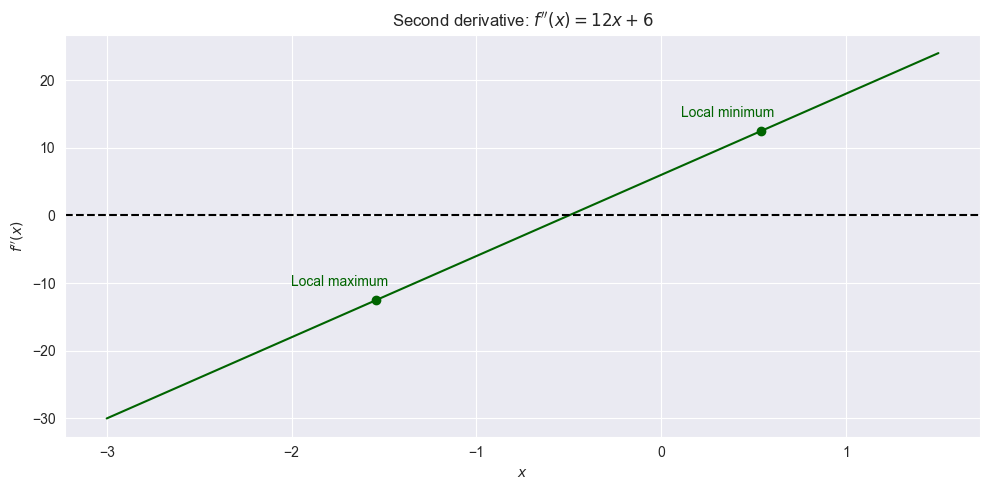

In [80]:
"""
Plot 2nd derivative
"""

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(domain, f_double_prime(domain), label=r'Second derivative: $f^\prime(x)$', color='darkgreen')
ax.scatter(critical_points, f_double_prime(critical_points), color="darkgreen")

for i, cp in enumerate(critical_points):
    if i == 0:
        name = "Local maximum"
    elif i == 1:
        name = "Local minimum"
    ax.annotate(name, xy=(cp, f_double_prime(cp)), xytext=(cp - 25, 10),
                textcoords='offset points', ha='center', color='darkgreen')

ax.axhline(0, color='black', ls="--")

ax.set_title(r'Second derivative: $f^{\prime \prime} (x) = 12x + 6$')
ax.set_xlabel('$x$')
ax.set_ylabel(r'$f^{\prime \prime}(x)$')

plt.tight_layout()

plt.savefig('example1_function_prime_prime.png', dpi=300)

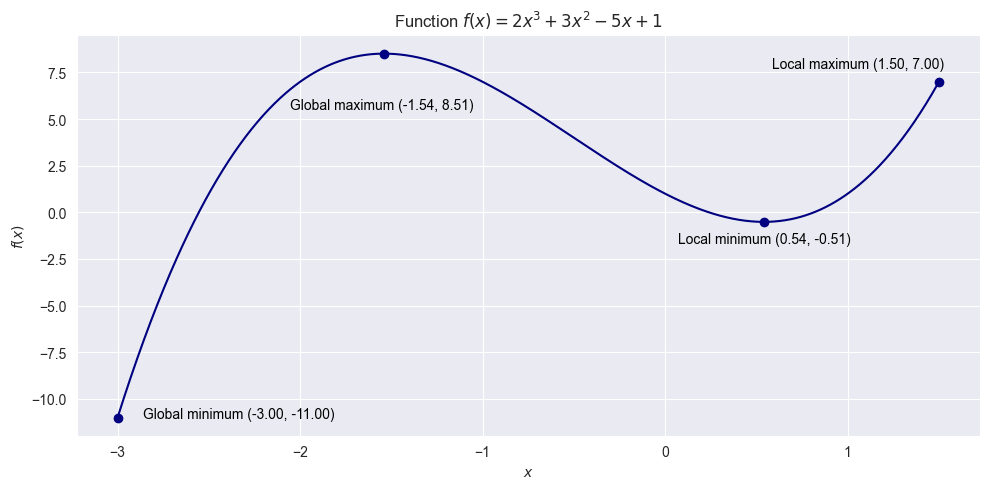

In [105]:
"""
Plot functions
"""

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(domain, f(domain), label='$f(x)$', color='navy')

# define candidate points
candidate_points = np.array(list(critical_points) + [domain[0] ,domain[-1]])

# scatter candidate points
ax.scatter(candidate_points, f(candidate_points), color="navy")


for i, cp in enumerate(candidate_points):

    offset_x = 0
    offset_y = 10
    if i == 0:
        name = "Global maximum"
        offset_x = 0
        offset_y = -40
    elif i == 1:
        name = "Local minimum"
        offset_y = - 15
    elif i == 2:
        name = "Global minimum"
        offset_x = 90
        offset_y = 0
    elif i == 3:
        name = "Local maximum"
        offset_x = -60
    ax.annotate(name + f" ({cp:.2f}, {f(cp):.2f})", xy=(cp, f(cp)), xytext=(cp + offset_x, offset_y),
                textcoords='offset points', ha='center', color='black')

ax.set_title(r'Function $f(x) = 2x^3 + 3x^2 - 5x + 1$')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

plt.tight_layout()

plt.savefig('example1_global.png', dpi=300)